## Task-D: Collinear features and their effect on linear models

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('task_d.csv')

In [3]:
data.head()

,x,y,z,x*x,2*y,2*z+3*x*x,w,target
0,-0.581066,0.841837,-1.012978,-0.604025,0.841837,-0.665927,-0.536277,0
1,-0.894309,-0.207835,-1.012978,-0.883052,-0.207835,-0.917054,-0.522364,0
2,-1.207552,0.212034,-1.082312,-1.150918,0.212034,-1.166507,0.205738,0
3,-1.364174,0.002099,-0.943643,-1.280666,0.002099,-1.266540,-0.665720,0
4,-0.737687,1.051772,-1.012978,-0.744934,1.051772,-0.792746,-0.735054,0


In [6]:
X = data.drop(['target'], axis=1).values
Y = data['target'].values

### Doing perturbation test to check the presence of collinearity  

#### Task: 1 Logistic Regression
<pre>


1. <b>Finding the Correlation between the features</b>
    a. check the correlation between the features
    b. plot heat map of correlation matrix using seaborn heatmap
2. <b>Finding the best model for the given data</b>
    a. Train Logistic regression on data(X,Y) that we have created in the above cell
    b. Find the best hyper prameter alpha with hyper parameter tuning using k-fold cross validation (grid search CV or         
    random search CV make sure you choose the alpha in log space)
    c. Creat a new Logistic regression with the best alpha
    (search for how to get the best hyper parameter value), name the best model as 'best_model'
    
3. <b>Getting the weights with the original data</b>
    a. train the 'best_model' with X, Y
    b. Check the accuracy of the model 'best_model_accuracy'
    c. Get the weights W using best_model.coef_

4. <b>Modifying original data</b>
    a. Add a noise(order of 10^-2) to each element of X 
    and get the new data set X' (X' = X + e)
    b. Train the same 'best_model' with data (X', Y)
    c. Check the accuracy of the model 'best_model_accuracy_edited'
    d. Get the weights W' using best_model.coef_
    
5. <b> Checking deviations in metric and weights </b>
    a. find the difference between 'best_model_accuracy_edited' and 'best_model_accuracy'
    b. find the absolute change between each value of W and W' ==> |(W-W')|
    c. print the top 4 features which have higher % change in weights 
    compare to the other feature

</pre>

#### Task: 2 Linear SVM

<pre>
1. Do the same steps (2, 3, 4, 5) we have done in the above task 1.
</pre>

<strong><font color='red'>Do write the observations based on the results you get from the deviations of weights in both Logistic Regression and linear SVM</font></strong>

## step 1 Finding the Correlation between the features

<AxesSubplot:>

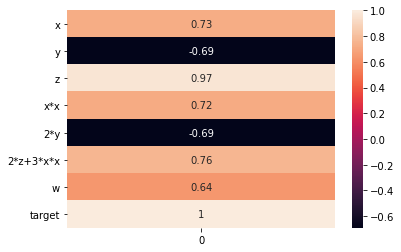

In [36]:
import seaborn as sn

corr_df=data.corr()['target']
corr=np.array(corr_df).reshape(8,1)
ylabel=list(data)                                       #ylabel from data heading
sn.heatmap(data=corr,annot=True,yticklabels=ylabel)         

## step 2 Finding the best model for the given data

In [11]:
# step 2
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

parameters = {'C':(np.logspace(-5,2))}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1) 
#https://machinelearningmastery.com/hyperparameter-optimization-with-random-search-and-grid-search/

log_reg=LogisticRegression()
log_reg_cv = GridSearchCV(log_reg, parameters,n_jobs=-1,return_train_score=True,cv=cv)
log_reg_cv.fit(X, Y)                                     # fitting on whole data for find out best hyperparameter 



print("best parameter = ",log_reg_cv.best_params_)
print("best score = ",log_reg_cv.best_score_)
print("best estimator = ",log_reg_cv.best_estimator_)


best parameter =  {'C': 1e-05}
best score =  1.0
best estimator =  LogisticRegression(C=1e-05)


## step 3 Getting the weights with the original data

In [12]:
# step 3
best_model=LogisticRegression(C=1e-05)
best_model.fit(X_train,y_train)             #fitting training data on best_hyperparameter_model 
y_pred=best_model.predict(X_test)
best_model_accuracy=accuracy_score(y_test, y_pred)  #getting the accuracy

weight=best_model.coef_
print("coef :-",weight)
print("accuracy = ",best_model_accuracy)


coef :- [[ 0.00032072 -0.00028317  0.00039242  0.00031842 -0.00028317  0.00033396
   0.00024287]]
accuracy =  1.0


## step 4 Modifying original data

In [13]:
import random
#print(X)
X_=[]
for i in range(len(X)):
    emp=[]
    for j in range(7):
        emp.append(X[i][j]+random.uniform(0.01, 0.09))
    X_.append(emp)
X_=np.array(X_)
for i in range(len(X_)):
    print(X_[i],X[i])

[-0.54982604  0.8782776  -0.96722296 -0.55973594  0.88198457 -0.62323514
 -0.47674957] [-0.5810659   0.84183714 -1.01297765 -0.60402468  0.84183714 -0.66592679
 -0.53627703]
[-0.81266249 -0.17488108 -0.93877223 -0.86847255 -0.18493569 -0.90517623
 -0.51190884] [-0.89430898 -0.2078351  -1.01297765 -0.88305213 -0.2078351  -0.91705408
 -0.52236404]
[-1.14746935  0.26406456 -1.07219399 -1.11386733  0.25029099 -1.10460022
  0.28240544] [-1.20755205  0.21203379 -1.08231219 -1.15091848  0.21203379 -1.16650718
  0.20573767]
[-1.29133121  0.04938639 -0.89555657 -1.26390788  0.03886202 -1.19533643
 -0.63090284] [-1.36417359  0.00209934 -0.94364311 -1.28066624  0.00209934 -1.26653955
 -0.66571996]
[-0.71112868  1.07804986 -0.9917153  -0.73310346  1.12312801 -0.75994972
 -0.65879822] [-0.73768744  1.05177159 -1.01297765 -0.74493354  1.05177159 -0.79274607
 -0.73505412]
[-0.07900231  1.75295755 -0.7180315  -0.11246259  1.75903396 -0.20607379
  0.57502377] [-0.11120129  1.68157493 -0.80497402 -0.164

In [14]:
X_train_,X_test_,y_train,y_test=train_test_split(X_,Y,test_size=0.2)  #adding error 

best_model.fit(X_train_,y_train)
y_pred_=best_model.predict(X_test_)
best_model_accuracy_edited=accuracy_score(y_test, y_pred_)
print("best_model_accuracy_edited = ",best_model_accuracy_edited)
weight_1=best_model.coef_
print("coef :-",weight_1)

best_model_accuracy_edited =  0.35
coef :- [[ 0.00030509 -0.0002559   0.00039144  0.00030828 -0.00025761  0.00032197
   0.00025669]]


In [15]:
print("different in accuracy = ",best_model_accuracy_edited-best_model_accuracy)

different in accuracy =  -0.65


## step 5 Checking deviations in metric and weights

In [38]:
change=weight-weight_1
print("Absolute change in weight = ",change)

per_chan=[]
for i in range(7):
    per_chan.append(abs(change[:,i]/weight[:,i])*100)

print(per_chan)

top=[]
idx=[]
top_fe=[]
fe= ylabel.copy()
for i in range(4):
    idx.append(per_chan.index(max(per_chan)))
    top.append(max(per_chan))
    per_chan.pop(idx[i])
    top_fe.append(fe[idx[i]])
    fe.pop(idx[i])
   
    
print("Top features are = ",top_fe)
print("with change in weight with percentage =",list(top))
    

Absolute change in weight =  [[ 1.56360504e-05 -2.72696547e-05  9.82976138e-07  1.01437788e-05
  -2.55573028e-05  1.19916094e-05 -1.38155766e-05]]
[array([4.8752295]), array([9.63010668]), array([0.2504906]), array([3.18562197]), array([9.02540041]), array([3.59070926]), array([5.68840211])]
Top features are =  ['y', '2*y', 'w', 'x']
with change in weight with percentage = [array([9.63010668]), array([9.02540041]), array([5.68840211]), array([4.8752295])]


## <span style='color:red'> According to logistic regression "y,2y,w,z" are the most important features by weight of that features. </span>

# Here we start LinearSVC

## step 2

In [17]:
from sklearn.svm import LinearSVC

parameters = {'C':(np.logspace(-5,2))}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

lr_svc=LinearSVC()
lr_svc_cv = GridSearchCV(lr_svc, parameters,n_jobs=-1,return_train_score=True,cv=cv)
lr_svc_cv.fit(X, Y)                                                   # fitting on whole data for find out best hyperparameter 



print("best parameter = ",lr_svc_cv.best_params_)
print("best score = ",lr_svc_cv.best_score_)
print("best estimator = ",lr_svc_cv.best_estimator_)


best parameter =  {'C': 1e-05}
best score =  1.0
best estimator =  LinearSVC(C=1e-05)


## step 3

In [18]:
best_model_1=LinearSVC(C=1e-05)

best_model_1.fit(X_train,y_train)             #fitting training data on best_hyperparameter_model 
y_pred_0=best_model_1.predict(X_test)
best_model_accuracy_1=accuracy_score(y_test, y_pred_0)

weight_01=best_model.coef_
print("coef :-",weight)
print("accuracy = ",best_model_accuracy_1)

coef :- [[ 0.00032072 -0.00028317  0.00039242  0.00031842 -0.00028317  0.00033396
   0.00024287]]
accuracy =  0.45


In [19]:
best_model_1.fit(X_train_,y_train)
y_pred_1=best_model_1.predict(X_test_)
best_model_accuracy_edited_1=accuracy_score(y_test, y_pred_1)
print("best_model_accuracy_edited = ",best_model_accuracy_edited_1)
weight_12=best_model_1.coef_
print("coef :-",weight_1)

best_model_accuracy_edited =  1.0
coef :- [[ 0.00030509 -0.0002559   0.00039144  0.00030828 -0.00025761  0.00032197
   0.00025669]]


In [20]:
print("different in accuracy = ",best_model_accuracy_edited_1-best_model_accuracy_1)

different in accuracy =  0.55


## step 5 Checking deviations in metric and weights with updated data set.

In [39]:
change=weight_01-weight_12
print("Absolute change in weight = ",change)

per_chan=[]
for i in range(7):
    per_chan.append(abs(change[:,i]/weight[:,i])*100)

print(per_chan)

top=[]
idx=[]
top_fe=[]
fe1=ylabel.copy()
for i in range(4):
    idx.append(per_chan.index(max(per_chan)))
    top.append(max(per_chan))
    per_chan.pop(idx[i])
    top_fe.append(fe1[idx[i]])
    fe1.pop(idx[i])
    
print("Top features are = ",top_fe)
print("with change in weight with percentage =",list(top))

Absolute change in weight =  [[-0.00090117  0.0007787  -0.00116603 -0.00090926  0.0007841  -0.00095067
  -0.00076046]]
[array([280.97800721]), array([274.99181594]), array([297.13726263]), array([285.54912561]), array([276.89836367]), array([284.66444331]), array([313.11065474])]
Top features are =  ['w', 'z', 'x*x', '2*z+3*x*x']
with change in weight with percentage = [array([313.11065474]), array([297.13726263]), array([285.54912561]), array([284.66444331])]


## <span style='color:red'>According to Linear SVM "w,z,x*x,2z+3x*x" are the most important features by weights and we can see that the small change in the data lead to huge change in weight of the features almost 3 time Therefore we can conclude that linear SVM is more sensitive to the changes in data or having high variance. </span>